# Análise de Dados da Fada Urbana (2019–2021)

Este projeto faz parte do meu portfólio de análise de dados e utiliza dados reais da Fada Urbana, minha própria empresa de papelaria e e-commerce, referentes ao período de 2019 a 2021. O objetivo é transformar os números em insights práticos que poderiam ter sido aplicados na época para apoiar decisões estratégicas.



In [1743]:
pip install mysql-connector-python sqlalchemy pandas matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1744]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [ ]:
# Dados da conexão
usuario = ''  
senha = ''
host = ''
porta = ''
banco = ''

# Cria engine de conexão
engine = create_engine(f'mysql+mysqlconnector://{usuario}:{senha}@{host}:{porta}/{banco}')

In [1746]:
df = pd.read_sql('SELECT * FROM fu_pedidos', engine)

In [1747]:
# Aplica o estilo seaborn nas tabelas
sns.set_theme(context='paper', 
              style="ticks",
              rc={'axes.titlesize': 15,
                 'font.size': 10, 
                 'axes.labelsize': 13, 
                 'xtick.labelsize': 10,
                 'ytick.labelsize': 10})
sns.set_palette(sns.cubehelix_palette(start=2))


In [1748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_item_id          3006 non-null   int64         
 1   order_id               3006 non-null   int64         
 2   product_id             3006 non-null   int64         
 3   variation_id           3006 non-null   int64         
 4   customer_id            3006 non-null   int64         
 5   date_created           3006 non-null   datetime64[ns]
 6   product_qty            3006 non-null   int64         
 7   product_net_revenue    3006 non-null   float64       
 8   product_gross_revenue  3006 non-null   float64       
 9   coupon_amount          3006 non-null   float64       
 10  shipping_amount        3006 non-null   float64       
 11  info_sku               2901 non-null   object        
 12  info_categorias        2901 non-null   object        
 13  inf

In [1749]:
# Mantém apenas as linhas em que a coluna info_sku não está nula

df = df[df['info_sku'].notnull()]

In [1750]:
# Tranforma o tipo dessas colunas para int. 

df[['info_ano_item','info_product_id']] = df[['info_ano_item', 'info_product_id']].astype('Int64')

In [1751]:
#Arredonda os números para 2 digitos de casas decimais. 

df[['shipping_amount', 'product_gross_revenue']] = df[['shipping_amount', 'product_gross_revenue']].round(2)

In [1752]:
#Exibe as primeiras linhas da tabela.

df.head()

,order_item_id,order_id,product_id,variation_id,customer_id,date_created,product_qty,product_net_revenue,product_gross_revenue,coupon_amount,shipping_amount,info_sku,info_categorias,info_product_id,info_city,info_state,info_ano_item,mes_venda,ano_venda
0,26,628,192,0,218,2019-09-30 11:43:58,1,144.42,169.81,0.0,25.39,PLA-GEO-ROSA-JAN20-DEZ20,Planer,192,são josé do rio preto,SP,2020,9,2019
1,30,635,163,0,220,2019-09-30 22:16:55,1,144.42,173.11,0.0,28.69,PLA-GIR-ROSA-JAN20-DEZ20,Planer,163,salvador,BA,2020,9,2019
2,32,764,223,0,221,2019-10-02 14:12:42,1,144.42,168.11,0.0,23.69,PLA-GIR-POA-PERM,Planer,223,são paulo,SP,<NA>,10,2019
3,38,774,450,0,223,2019-10-02 18:44:17,1,83.30,107.97,0.0,24.67,AGE-DIA-ROAZ-JAN20-DEZ20,Agenda,450,rio de janeiro,RJ,2020,10,2019
4,40,798,163,0,224,2019-10-02 23:22:52,1,144.42,202.01,0.0,57.59,PLA-GIR-ROSA-JAN20-DEZ20,Planer,163,três lagoas,MS,2020,10,2019


In [1753]:
# Deleta as instâncias com valor zero da coluna product_net_revenue.

df = df[df['product_net_revenue'] != 0]

# **Análise estatística descritiva.**

In [1754]:
# Identifica estatísticas básicas da tabela. 

df[['product_qty', 'product_net_revenue', 'product_gross_revenue', 'coupon_amount', 'shipping_amount']].describe().round(2)

,product_qty,product_net_revenue,product_gross_revenue,coupon_amount,shipping_amount
count,2894.00,2894.00,2894.00,2894.00,2894.00
mean,1.02,122.04,142.22,1.91,20.18
std,0.23,57.57,64.37,4.96,13.42
min,1.00,2.40,9.70,0.00,0.00
25%,1.00,69.00,82.90,0.00,11.66
50%,1.00,149.51,174.62,0.00,19.20
75%,1.00,169.90,195.41,0.00,27.81
max,8.00,288.83,319.12,31.80,93.71


In [1755]:
# Exibe a data da primeira e da última compra no site. 

print(f"Primeiro registro de compra: {df['date_created'].min().strftime('%d/%m/%Y')}")
print(f"Último registro de compra: {df['date_created'].max().strftime('%d/%m/%Y')}")

Primeiro registro de compra: 30/09/2019
Último registro de compra: 16/07/2021


In [1756]:
# Calcula o número total de pedidos: 
total_pedidos = df['order_id'].nunique()
print(f"Total de pedidos únicos: {total_pedidos}")

Total de pedidos únicos: 2150


In [1757]:
# Calcula o valor total do faturamento
total_faturamento = df['product_net_revenue'].sum()
print(f"Faturamento total: R${total_lucro:,.2f}".replace('.',',').replace(',','.',1))

Faturamento total: R$353.172,86


In [1758]:
# Calcula o valor total do frete
total_frete = (df['shipping_amount'] * df['product_qty']).sum()

print(f"Valor total de frete: R${total_frete:,.2f}".replace('.',',').replace(',','.',1))

Valor total de frete: R$59.264,03


In [1759]:
# Calcula o ticket médio
ticket_medio = total_faturamento / total_pedidos

print(f"Ticket médio: R${ticket_medio:,.2f}".replace('.',',',1))

Ticket médio: R$164,27


In [1760]:
# Soma a quantidade de vendas por sku
df.groupby('info_sku')['product_qty'].sum().sort_values(ascending=False).head(10)


info_sku
PLA21-COL                   265
PLA21-MIS                   229
PLA21-ANI                   147
PLA-COL-JAN20-DEZ20         125
PLA-ANI-BLAC-JAN20-DEZ20    100
PLA21-BOR                    95
PLA21-FLO                    92
PLA-GEO-ROSA-JAN20-DEZ20     65
PLA-RAI-BLUE-JAN20-DEZ20     61
PLA-SIM-ANI                  56
Name: product_qty, dtype: int64

In [1761]:
# Cria coluna com valor total (preço x quantidade) por item
df['total_revenue'] = df['product_net_revenue'] * df['product_qty']


In [1762]:
# Soma a receita por sku
df.groupby('info_sku')['total_revenue'].sum().sort_values(ascending=False).head(10)

info_sku
PLA21-COL                   45807.68
PLA21-MIS                   39672.90
PLA21-ANI                   25466.06
PLA-COL-JAN20-DEZ20         20411.96
PLA-ANI-BLAC-JAN20-DEZ20    16519.38
PLA21-BOR                   16468.77
PLA21-FLO                   15969.02
PLA-GEO-ROSA-JAN20-DEZ20    10637.42
PLA-RAI-BLUE-JAN20-DEZ20     9939.14
PLA-RAI-ROSE-JAN20-DEZ20     7779.58
Name: total_revenue, dtype: float64

In [1763]:
# Converte a coluna para datetime 
df.loc[:, 'date_created'] = pd.to_datetime(df['date_created'])

# Agrupa por mês/ano e conta pedidos únicos por mês
pedidos_por_mes = df.groupby(df['date_created'].dt.to_period('M'))['order_id'].nunique()

print(pedidos_por_mes)


date_created
2019-09      2
2019-10    124
2019-11    373
2019-12    306
2020-01    292
2020-10      2
2020-11    295
2020-12    294
2021-01    270
2021-02     50
2021-03     63
2021-04     43
2021-05     18
2021-06     11
2021-07      7
Freq: M, Name: order_id, dtype: int64



#

# **Análise exploratória com gráficos.**

In [1764]:
# Calcula a receita por mês
df_mensal = df.groupby(df['date_created'].dt.to_period('M')).agg({'total_revenue': 'sum'}).reset_index()

# Volta para datetime
df_monthly['date_created'] = df_mensal['date_created'].dt.to_timestamp()  

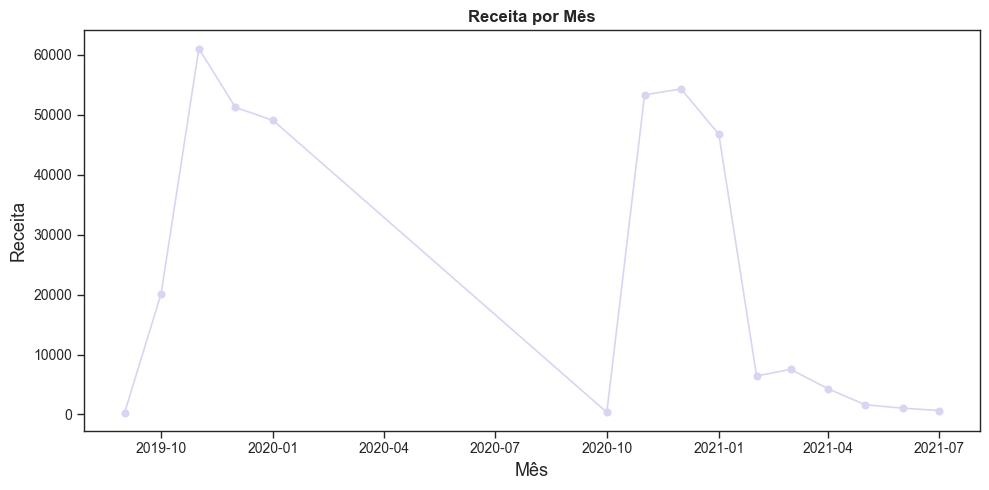

<Figure size 640x480 with 0 Axes>

In [1765]:
# Plota gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(df_monthly['date_created'], df_mensal['total_revenue'], marker='o')
plt.title('Receita por Mês', fontweight='bold', fontsize=12)
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

sns.despine()


In [1766]:
# Calcula a média de vendas por mês
df_avg_mes = df.groupby(df['date_created'].dt.to_period('M')).agg({'total_revenue': 'mean'}).reset_index()


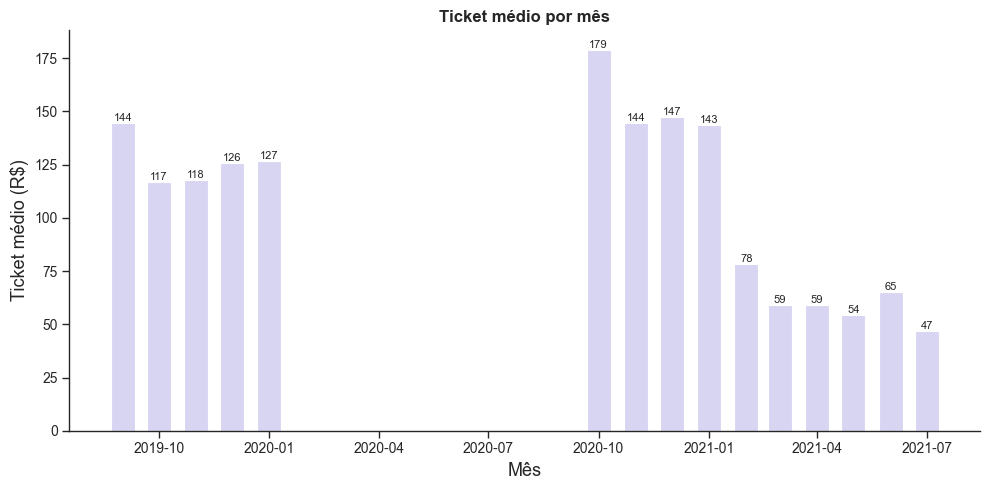

In [1767]:
# Plota gráfico de barras com valores
plt.figure(figsize=(10, 5))
bars = plt.bar(df_monthly['date_created'], df_avg_mes['total_revenue'], width=20)
plt.title('Ticket médio por mês', fontweight='bold', fontsize=12)
plt.xlabel('Mês')
plt.ylabel('Ticket médio (R$)')
plt.xticks(rotation=0)

# Mostra valores em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=8)

sns.despine()

plt.tight_layout()
plt.show()

In [1768]:
# Calcula o faturamento por categoria
df_categoria = df.groupby(df['info_categorias']).agg({'total_revenue': 'sum'}).reset_index()

# Ordena do maior para o menor
df_categoria = df_categoria.sort_values(by='total_revenue', ascending=True)

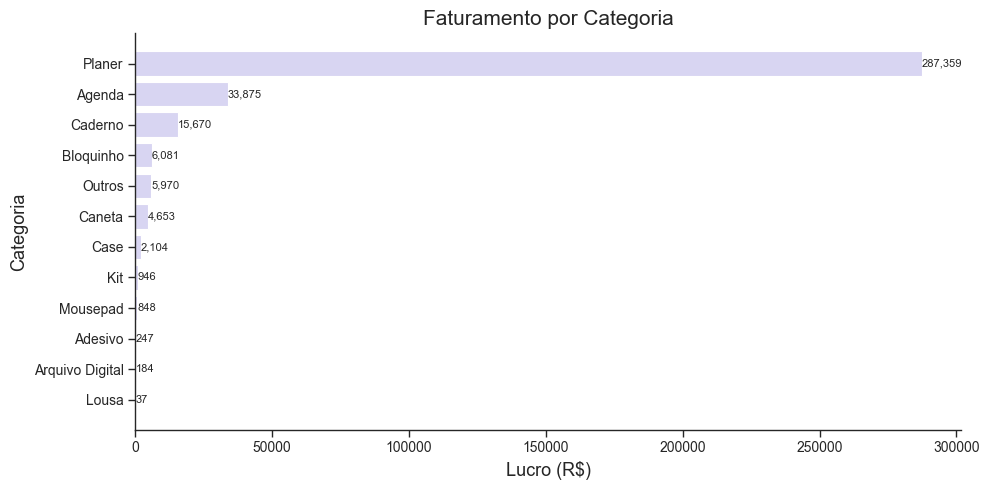

In [1769]:
# Plota gráfico de barras com valores
plt.figure(figsize=(10, 5))
bars = plt.barh(df_categoria['info_categorias'], df_categoria['total_revenue'])

# Adiciona título e rótulos
plt.title('Faturamento por Categoria')
plt.xlabel('Lucro (R$)')
plt.ylabel('Categoria')

# Mostra valores em cima das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=8)
sns.despine()
plt.tight_layout()
plt.show()

In [1770]:
# Agrupa e soma a quantidade de produtos vendidos
df_produtos = df.groupby(df['info_sku']).agg({'product_qty': 'sum'}).reset_index()

# Ordena do maior para o menor e pega os 10 mais vendidos
df_produtos = df_produtos.sort_values(by='product_qty', ascending=False).head(10)


# Ordena do menor para o maior
df_produtos = df_produtos.sort_values(by='product_qty', ascending=True)

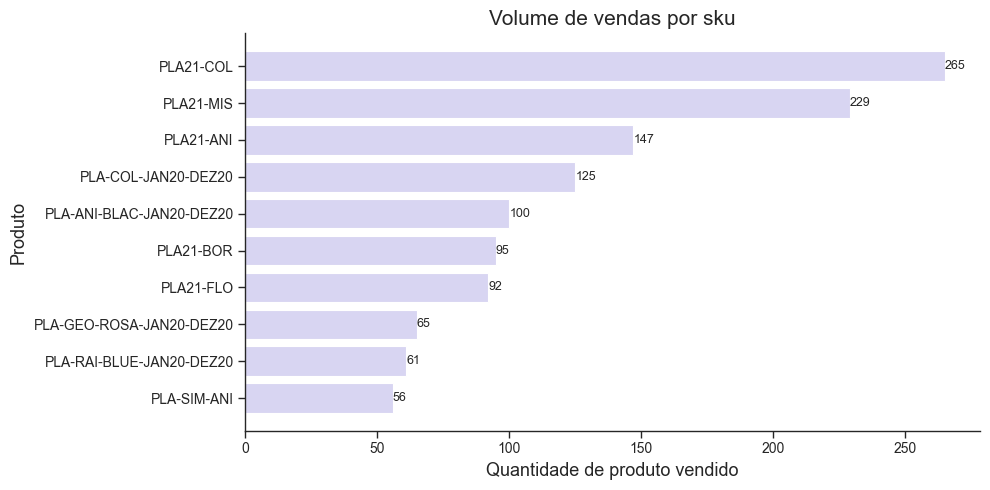

In [1771]:
# Plota gráfico de barras com valores
plt.figure(figsize=(10, 5))
sns.despine()

bars = plt.barh(df_produtos['info_sku'], df_produtos['product_qty'])

plt.title('Volume de vendas por sku')
plt.xlabel('Quantidade de produto vendido')
plt.ylabel('Produto')

# Mostra valores em cima das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=9)

sns.despine()

plt.tight_layout()
plt.show()

In [1781]:
# Calcula a média de frete por estado
df_frete = df.groupby(df['info_state']).agg({'shipping_amount': 'mean'}).reset_index()

# Ordena do menor para o maior
df_frete = df_frete.sort_values(by='shipping_amount', ascending=True)

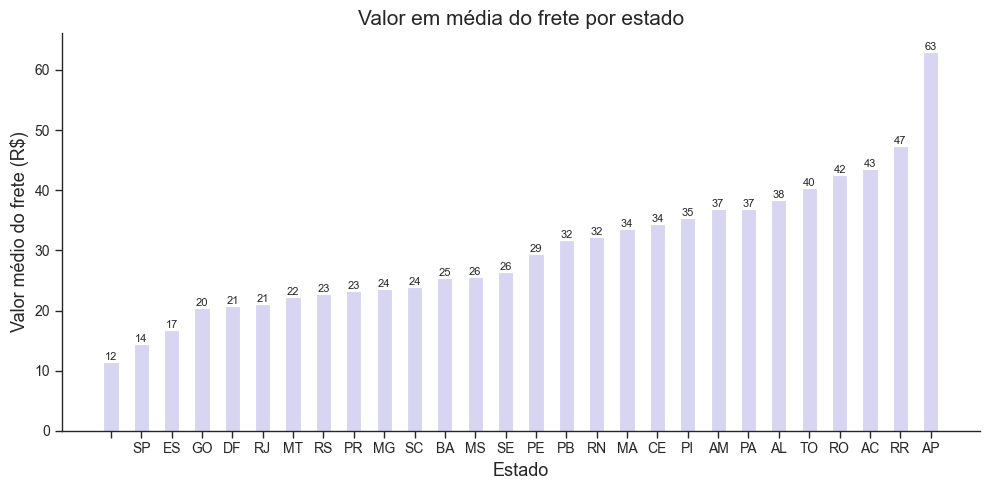

In [1782]:
# Plota gráfico de barras com valores

plt.figure(figsize=(10, 5))
bars = plt.bar(df_frete['info_state'], df_frete['shipping_amount'], width=0.5)

sns.despine()
plt.title('Valor em média do frete por estado')
plt.xlabel('Estado')
plt.ylabel('Valor médio do frete (R$)')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=8)
sns.despine()

plt.tight_layout()
plt.show()


In [1774]:
# Corrige a grafia da categoria Planner
df['info_categorias'] = df['info_categorias'].replace('Planer', 'Planner')

In [1775]:
# Cria uma coluna e concatena a categoria com o ano de lançamento do produto
df['ano_produto'] = df['info_categorias']+' '+df['info_ano_item'].astype(str).fillna(' ')

print(df['ano_produto'].unique())


['Planner 2020' 'Planner <NA>' 'Agenda 2020' 'Caderno <NA>' 'Outros <NA>'
 'Bloquinho <NA>' 'Planner 2021' 'Adesivo <NA>' 'Arquivo Digital <NA>'
 'Caneta <NA>' 'Case <NA>' 'Mousepad <NA>' 'Kit <NA>' 'Lousa <NA>']


In [1776]:
# Filtra as categorias para Planner e Agenda
df_filtrado = df[df['ano_produto'].isin(['Planner 2020', 'Planner 2021', 'Agenda 2020'])]

# Calcula o total de vendas por mês
df_mes_produto = (df_filtrado.groupby([df_filtrado['date_created'].dt.to_period('M'), 'ano_produto'])['total_revenue'].sum().reset_index())

# Converte o período para string para o gráfico
df_mes_produto['date_created'] = df_mes_produto['date_created'].astype(str)



# Comparação de faturamento Planner vs. Agenda

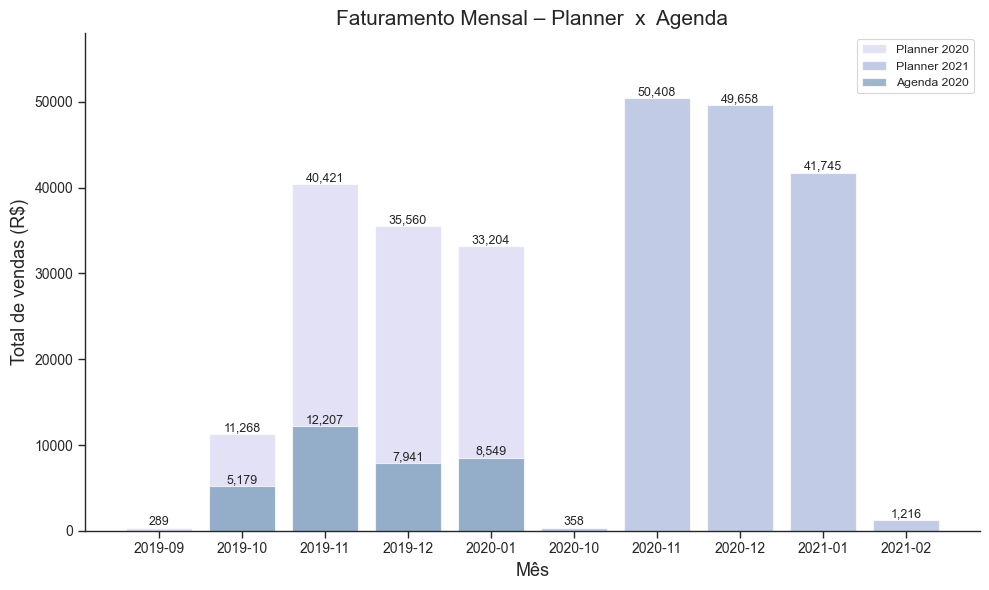

In [1777]:
# Plota gráfico de barras com valores
plt.figure(figsize=(10, 6))

for categoria in ['Planner 2020', 'Planner 2021', 'Agenda 2020']:
    dados_categoria = df_mes_produto[df_mes_produto['ano_produto'] == categoria]
    bars = plt.bar(dados_categoria['date_created'], dados_categoria['total_revenue'], 
                   label=categoria, alpha=0.7)
    
    # Adiciona os valores acima das barras
    for bar in bars:
        altura = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, altura,
                 f'{altura:,.0f}', ha='center', va='bottom', fontsize=9)

# 4. Ajustes de gráfico
plt.title('Faturamento Mensal – Planner  x  Agenda')
plt.xlabel('Mês')
plt.ylabel('Total de vendas (R$)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

max_val = df_mes_produto['total_revenue'].max()
plt.ylim(0, max_val * 1.15)  # deixa 15% de espaço acima da barra mais alta

sns.despine()

plt.show()

In [1778]:
# Filtra só as categorias para comparar Planner 2020 x Planner 2021
df_filtrado_planner = df[df['ano_produto'].isin(['Planner 2020', 'Planner 2021'])]

# Calcula a quantidade de planners vendidos por mês
df_mes_produto = (df_filtrado_planner.groupby([df_filtrado_planner['date_created'].dt.to_period('M'), 'ano_produto'])['product_qty'].sum().reset_index())



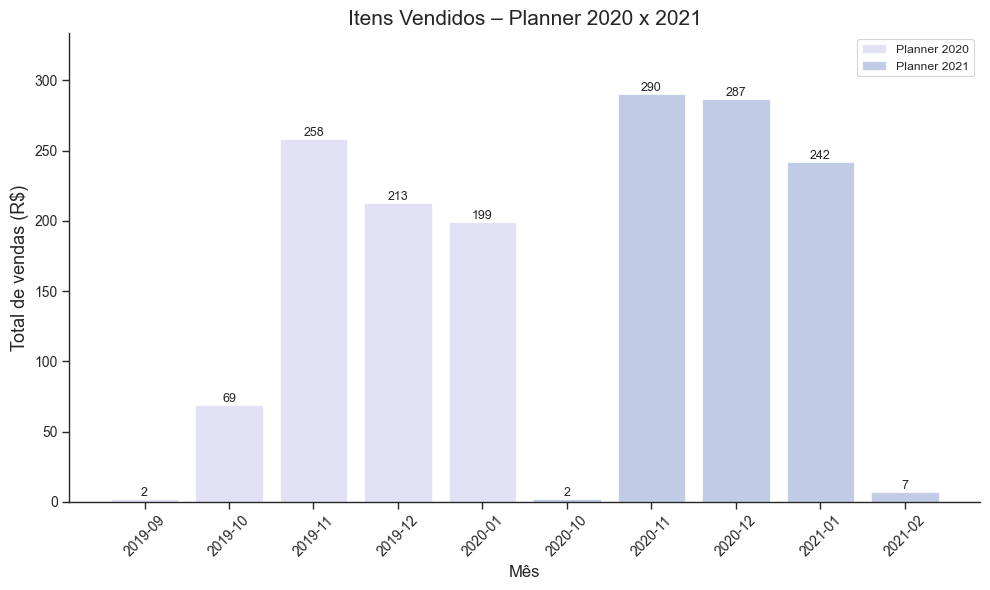

In [1779]:
# Converte o período para string para o gráfico
df_mes_produto['date_created'] = df_mes_produto['date_created'].astype(str)

# Plota gráfico de barras com valores
plt.figure(figsize=(10, 6))

for categoria in ['Planner 2020', 'Planner 2021']:
    dados_categoria = df_mes_produto[df_mes_produto['ano_produto'] == categoria]
    bars = plt.bar(dados_categoria['date_created'], dados_categoria['product_qty'], 
                   label=categoria, alpha=0.7)
    
    # Adiciona os valores acima das barras
    for bar in bars:
        altura = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, altura,
                 f'{altura:,.0f}', ha='center', va='bottom', fontsize=9)


plt.title('Itens Vendidos – Planner 2020 x 2021')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de vendas (R$)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks()
plt.legend()
plt.tight_layout()

max_val = df_mes_produto['product_qty'].max()
plt.ylim(0, max_val * 1.15)  # deixa 15% de espaço acima da barra mais alta

sns.despine()
plt.show()

## Resumo de Insights

- O faturamento total apresentou crescimento consistente em determinados meses, indicando sazonalidade nas vendas.

- Produtos da categoria Planner mostraram desempenho superior em comparação com Agenda, especialmente em meses específicos.

- Comparando os anos, é possível identificar tendências de compra recorrentes e picos de demanda.

- Alguns produtos tiveram baixo desempenho constante, sugerindo oportunidades para ajustes no portfólio ou promoções.

- Em 2020, devido à pandemia, houve uma decisão estratégica de parar a venda de agendas, o que explica a queda brusca nas vendas desta categoria.

- O faturamento da categoria Planner em 2021 apresenta queda em determinados meses porque o estoque acabou, refletindo limitações logísticas e não queda na demanda.

- Apesar das oscilações de vendas, observa-se que produtos bem posicionados mantêm consistência em meses fora de campanhas ou estoques baixos.

- A sazonalidade das vendas é evidente, com picos concentrados antes do início do ano escolar, especialmente para planners.

- Comparando 2019, 2020 e 2021, é possível perceber o impacto de eventos externos (como a pandemia) e decisões internas (descontinuação de produtos e estoque) sobre o desempenho de vendas.

- Alguns produtos menos vendidos podem indicar oportunidade de repensar o portfólio ou criar promoções para aumentar a rotatividade.